In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from kNN import *

In [2]:
#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

In [3]:
#just to make all random sequences on all computers the same.
np.random.seed(1)

In [4]:
#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]


inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

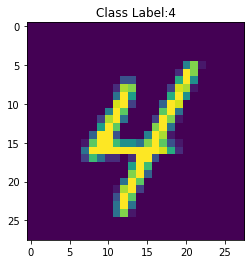

In [5]:
#show the 10'th train image
i=10
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()

# 7.

## b.

In [6]:
class_acc, acc, inacc = kNN(images_train[:1000], labels_train[:1000], images_test[:1000], labels_test[:1000], 3,\
                           return_inaccurate_indexes = True)

<class 'numpy.ndarray'>


In [7]:
class_acc

array([0.97, 1.  , 0.84, 0.86, 0.83, 0.79, 0.95, 0.88, 0.79, 0.89])

In [8]:
acc

0.88

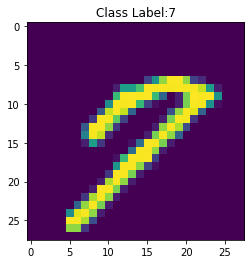

In [9]:
i = inacc[15]
im = images_test[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_test[i][0]))
plt.show()

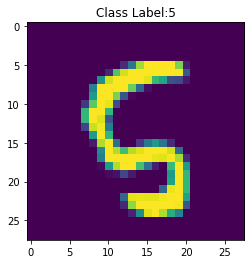

In [10]:
i = inacc[3]
im = images_test[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_test[i][0]))
plt.show()

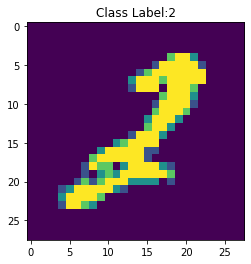

In [11]:
i = inacc[10]
im = images_test[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_test[i][0]))
plt.show()

## c.

In [12]:
num_training_data_points = [30, 65, 100, 425, 750, 1000, 1250, 2500, 5000, 10000]
accuracy = []
for num in num_training_data_points:
    class_acc, acc = kNN(images_train[:num], labels_train[:num], images_test[:num], labels_test[:num], 1)
    accuracy.append(acc)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Performance of 1-NN Classifier With Varying Size of Training Data')

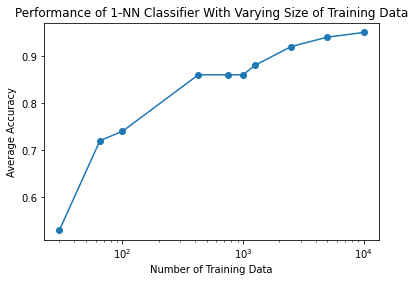

In [13]:
plt.scatter(num_training_data_points, accuracy)
plt.plot(num_training_data_points, accuracy)
plt.xscale("log")
plt.xlabel("Number of Training Data")
plt.ylabel("Average Accuracy")
plt.title("Performance of 1-NN Classifier With Varying Size of Training Data")

## d.

In [14]:
trial_k = [1, 2, 3, 5, 10]

In [25]:
k_accuracies = []
for k in trial_k:
    data_points_acc = []
    for num in num_training_data_points:
        class_acc, acc = kNN(images_train[:num], labels_train[:num], images_test[:num], labels_test[:num], k)
        data_points_acc.append(acc)
    k_accuracies.append(data_points_acc)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Performance of kNN Classifier')

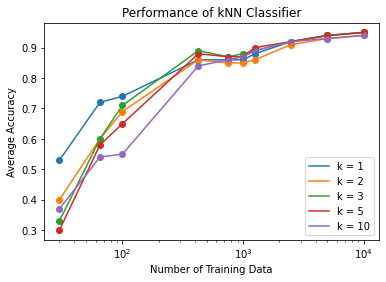

In [26]:
for i, k_set in enumerate(k_accuracies):
    plt.scatter(num_training_data_points, k_set)
    plt.plot(num_training_data_points, k_set, label="k = {}".format(trial_k[i]))
plt.xscale("log")
plt.xlabel("Number of Training Data")
plt.ylabel("Average Accuracy")
plt.legend()
plt.title("Performance of kNN Classifier")

## e.

In [27]:
average_acc = []
for k in trial_k:
    acc = kNN(images_train[:1000], labels_train[:1000], images_train[1000:2000], labels_train[1000:2000], k)[1]
    average_acc.append(acc)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Performance of kNN Classifier With Varying k')

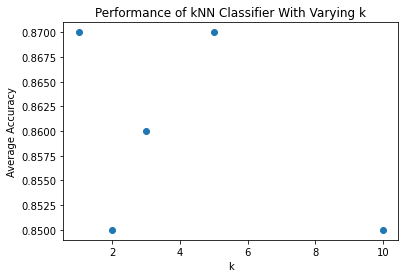

In [28]:
plt.scatter(trial_k, average_acc)
plt.xlabel("k")
plt.ylabel("Average Accuracy")
plt.title("Performance of kNN Classifier With Varying k")

In [30]:
average_acc

[0.87, 0.85, 0.86, 0.87, 0.85]

It looks like k=1 or k = 5 is the best for 1000 data points.